### Benjamin Crom (Panther# 002-36-7349)
__Mini-Project 1: Simulations & Data Visualization__<br>
__CS 6980: Introduction to Data Science__<br>
__29 January 2018__

## How to Run this Notebook
### Run This Notebook Online
* Navigate to https://goo.gl/yU8u26
* Run all code:
  * Select __Kernel→Restart & Run All__ from the menu bar
  * Click the __Restart and Run All Cells__ button

### Run this Notebook Locally

#### Dependencies
* Python3
* Numpy
* Matplotlib
* Jupyter Notebook

##### Run with Ubuntu/Debian
* Download this notebook by navigating to https://goo.gl/yU8u26 and selecting __File→Download as→Notebook (.ipynb)__ from the menu bar
* Open a terminal and navigate to the folder containing the downloaded notebook
* Enter these commands in a terminal to install Python3, the Numpy library, the Matplotlib library, and the Jupyter Notebook:
```
sudo apt-get update
sudo apt-get install python3 python3-pip
sudo pip3 install numpy matplotlib jupyter
jupyter notebook
```
* After Jupyter opens, click on the link which reads __Benjamin_Crom_Mini_Project_1.ipynb__
* Run all code:
  * Select __Kernel→Restart & Run All__ from the menu bar
  * Click the __Restart and Run All Cells__ button

##### Run with OSX
* Install Python3 by following the instructions at http://docs.python-guide.org/en/latest/starting/install3/osx/#install3-osx
* Download this notebook by navigating to https://goo.gl/yU8u26 and selecting __File→Download as→Notebook (.ipynb)__ from the menu bar
* Open a terminal and navigate to the folder containing the downloaded notebook
* Enter these commands in a terminal to install the Numpy and Matplotlib libraries as well as the Jupyter Notebook:
```
sudo pip3 install numpy matplotlib jupyter
jupyter notebook
```
* After Jupyter opens, click on the link which reads __Benjamin_Crom_Mini_Project_1.ipynb__
* Run all code:
  * Select __Kernel→Restart & Run All__ from the menu bar
  * Click the __Restart and Run All Cells__ button

##### Run with Windows
* Install Python3 by following the instructions at http://docs.python-guide.org/en/latest/starting/install3/win/#install3-windows
* Download this notebook by navigating to https://goo.gl/yU8u26 and selecting __File→Download as→Notebook (.ipynb)__ from the menu bar
* Open a terminal and navigate to the folder containing the downloaded notebook
* Enter these commands in a terminal to install the Numpy and Matplotlib libraries as well as the Jupyter Notebook:
```
python -m pip install -U numpy matplotlib jupyter
jupyter notebook
```
* After Jupyter opens, click on the link which reads __Benjamin_Crom_Mini_Project_1.ipynb__
* Run all code:
  * Select __Kernel→Restart & Run All__ from the menu bar
  * Click the __Restart and Run All Cells__ button


&nbsp;

&nbsp;

## Introduction
In this mini-project you will simulate and visualize data using Matlab (or your preferred coding language).

The ambient dimension of the data will be D = 4. You may choose the number of samples N; I suggest at
least N = 100. The 4 rows in this matrix will contain information about height, weight, glucose level, and a
label in {0, 1} indicating healthy or diabetic.


In [1]:
import matplotlib.pyplot
import numpy

DIMENSION = 4
NUM_SAMPLES = 500

#### (a) Generate a 4 × 500 data matrix __X__, initially populated with zeros.

In [2]:
data_matrix = numpy.zeros((DIMENSION, NUM_SAMPLES))

#### (b) Populate the first row with i.i.d. random variables *N*(165, 25) (simulating height), and the second row with i.i.d. random variables *N*(137, 100) (simulating weight).

In [3]:
first_row_mu, first_row_sigma = 165, numpy.sqrt(25)
data_matrix[0] = numpy.random.normal(first_row_mu, first_row_sigma, NUM_SAMPLES).round(decimals=2)

second_row_mu, second_row_sigma = 137, numpy.sqrt(100)
data_matrix[1] = numpy.random.normal(second_row_mu, second_row_sigma, NUM_SAMPLES).round(decimals=2)

#### (c) Does this data make sense? Are all values reasonable? How would you *clean/preprocess* this data?

__Cleaning/preprocessing steps:__
* Verify the mean and variance of each row
* Ensure the data has a consistent type and that there are no missing values
* View the domain for each row (see below) to ensure these are all believable height and weight values
* Verify that the histogram for each row (see below) roughly matches a Gaussian distribution
* Remove outliers which are a given multiple of standard deviations from the mean *(optional)*
* Partition the data points into bins either by analysis or by using a discretization algorithm *(optional)*

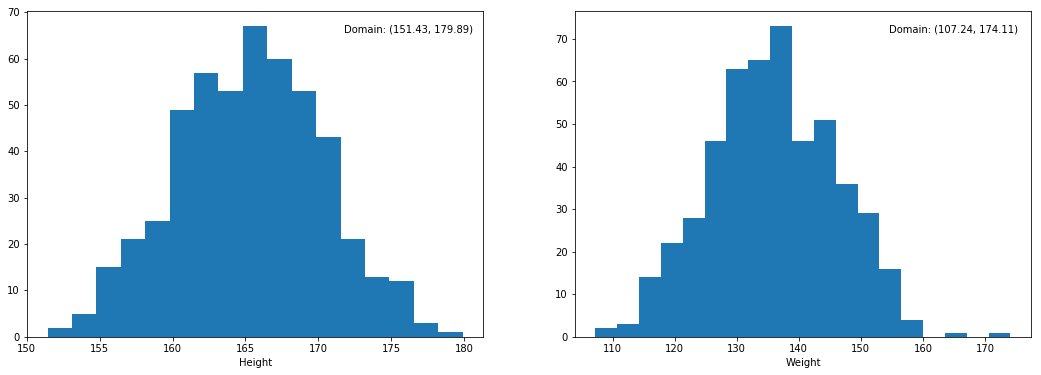

In [4]:
def clean_and_preprocess_row(label, column, row_variable_list, mu, sigma):
    assert(abs(mu - numpy.mean(row_variable_list)) < sigma)            # Verify the mean
    assert(abs(sigma - numpy.std(row_variable_list, ddof=1)) < sigma)  # and the variance
    matplotlib.pyplot.subplot(1, 2, column)
    matplotlib.pyplot.hist(row_variable_list, bins='auto')
    matplotlib.pyplot.xlabel(label)
    matplotlib.pyplot.figtext(.37 * column + 0.05 * (column - 1),
                              .83,
                              'Domain: {}'.format(str((min(row_variable_list), max(row_variable_list)))))

matplotlib.pyplot.subplots(ncols=2, figsize=(18, 6))
clean_and_preprocess_row('Height', 1, data_matrix[0], first_row_mu, first_row_sigma)
clean_and_preprocess_row('Weight', 2, data_matrix[1], second_row_mu, second_row_sigma)
matplotlib.pyplot.show()


&nbsp;

&nbsp;

#### (d) Visualize/plot your preprocessed data (in two dimensions).

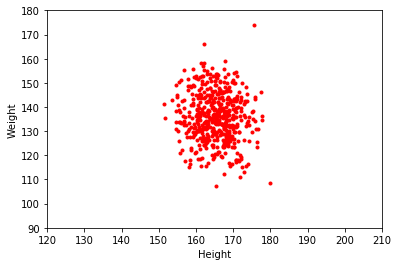

In [5]:
matplotlib.pyplot.scatter(data_matrix[0], data_matrix[1], marker='.', color='r')
matplotlib.pyplot.axis([120, 210, 90, 180])
matplotlib.pyplot.xlabel('Height')
matplotlib.pyplot.ylabel('Weight')
matplotlib.pyplot.show()

#### (e) Compute the weight/height ratio of each sample, and show its histogram.

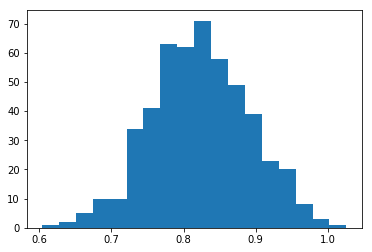

In [6]:
weight_height_ratio_list = data_matrix[1] / data_matrix[0]
matplotlib.pyplot.hist(weight_height_ratio_list, bins='auto')
matplotlib.pyplot.show()

#### (f) Model/simulate the glucose level of each individual as a noisy version of its weight/height ratio (ratio \+ noise), and store this value in the third row of your data matrix __X__. Let the noise be i.i.d. *N*(0, σ^2).

In [7]:
def set_glucose_row(data_matrix, noise_sigma):
    noise_mu = 0.0
    noise_value_list = numpy.random.normal(noise_mu, noise_sigma, len(data_matrix[0]))
    weight_height_ratio_list = data_matrix[1] / data_matrix[0]
    data_matrix[2] = weight_height_ratio_list + noise_value_list

#### (g) We will model an individual as healthy (label = 0) if its glucose level (as defined above) is below a threshold τ, and diabetic otherwise (label = 1). Store these labels in the fourth row of your data matrix __X__.

In [8]:
def set_diabetic_row(data_matrix, tau):
    data_matrix[3] = (data_matrix[2] > tau) * 1

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

#### (h) Visualize/plot the clustered data (in two dimensions) for different values of σ and τ.

In [9]:
def plot_new_graphs(data_matrix, sigma_tau_tuple_list):
    for i, (noise_sigma, tau) in enumerate(sigma_tau_tuple_list):    
        set_glucose_row(data_matrix, noise_sigma)
        set_diabetic_row(data_matrix, tau)

        column_index = i % 2
        if column_index == 0:
            is_not_last_item = i + 1 < len(sigma_tau_tuple_list)
            num_cols = int(is_not_last_item) + 1
            matplotlib.pyplot.subplots(ncols=num_cols, figsize=(15, 5))

        matplotlib.pyplot.subplot(1, 2, column_index + 1)

        healthy_x = data_matrix[0, data_matrix[3] == 0]
        healthy_y = data_matrix[1, data_matrix[3] == 0]
        healthy_points = matplotlib.pyplot.scatter(healthy_x, healthy_y, marker='.', color='g')

        diabetic_x = data_matrix[0, data_matrix[3] == 1]
        diabetic_y = data_matrix[1, data_matrix[3] == 1]
        diabetic_points = matplotlib.pyplot.scatter(diabetic_x, diabetic_y, marker='.', color='r')

        matplotlib.pyplot.axis([120, 210, 90, 180])
        matplotlib.pyplot.figtext(.43 + (column_index * .42), .83, 'σ = {}'.format(noise_sigma))
        matplotlib.pyplot.figtext(.43 + (column_index * .42), .78, 'τ = {}'.format(tau))
        matplotlib.pyplot.xlabel('Height')
        matplotlib.pyplot.ylabel('Weight')
        matplotlib.pyplot.legend((healthy_points, diabetic_points),
                                 ('Healthy ', 'Diabetic'),
                                 scatterpoints=1,
                                 loc='lower left',
                                 ncol=2,
                                 fontsize=8)

    matplotlib.pyplot.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

__Different values of σ:__

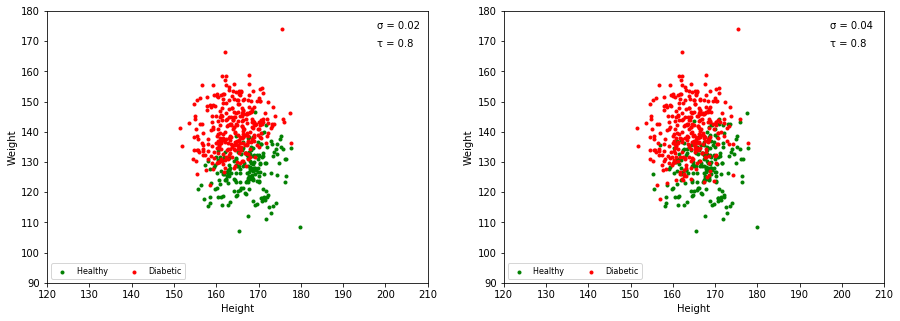

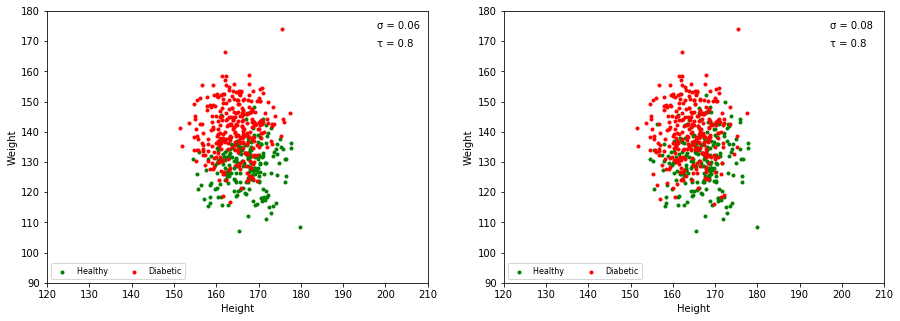

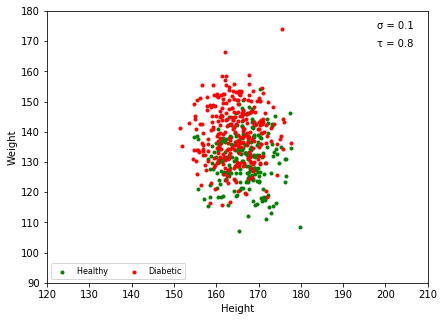

In [10]:
sigma_tau_tuple_list = [(0.02, 0.8), (0.04, 0.8), (0.06, 0.8), (0.08, 0.8), (0.1, 0.8)]
plot_new_graphs(data_matrix, sigma_tau_tuple_list)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

__Different values of τ:__

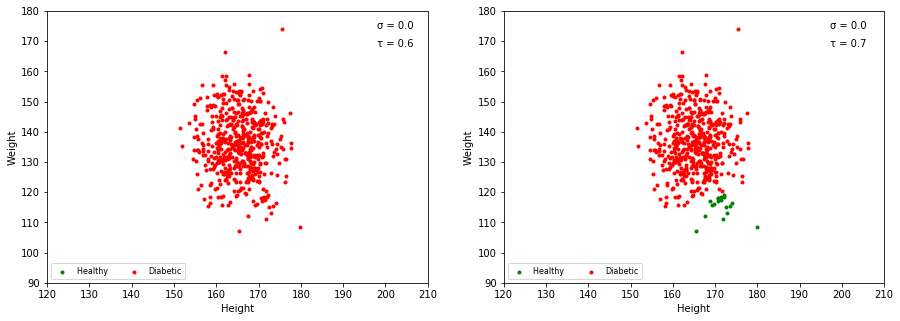

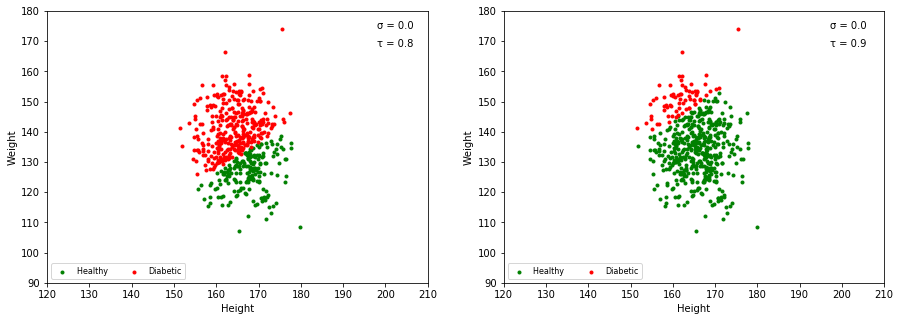

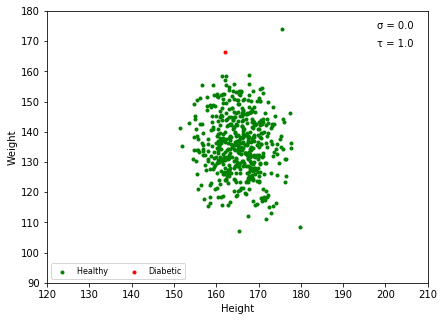

In [11]:
sigma_tau_tuple_list = [(0.00, 0.6), (0.00, 0.7), (0.00, 0.8), (0.00, 0.9), (0.00, 1.0)]
plot_new_graphs(data_matrix, sigma_tau_tuple_list)

#### (i) How do σ and τ affect the data?

Adjusting σ changes the standard deviation of the Guassian distribution for the noise values which are used to create glucose levels for all individuals. Increasing σ decreases the correlation between an individual's weight/height ratio and that individual's glucose level. This means that increasing σ decreases the correlation between an individual's weight/height ratio and whether or not that individual has diabetes.

Adjusting τ changes the glucose level threshold at which an individual is classified as diabetic. Increasing τ will increase the slope of the line which best divides the healthy people from the diabetic people. This will increase the number of individuals considered healthy.